In [1]:
import numpy as np
import imageio
%matplotlib inline
import matplotlib.pyplot as plt
from utils import * # tic toc imshow
%load_ext line_profiler

import higra as hg

Image size: (481, 321)


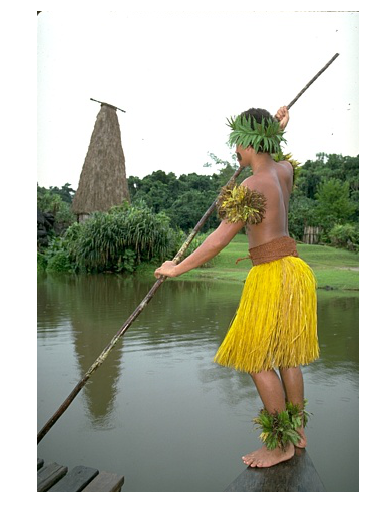

In [2]:
image = imageio.imread("data/101087.jpg")
# switch to float to avoir numerical issue with uint8
image = image.astype(np.float64)/255 
# discard the color channel
size = image.shape[:2]
print("Image size:", size)
imshow(image)

(481, 321)


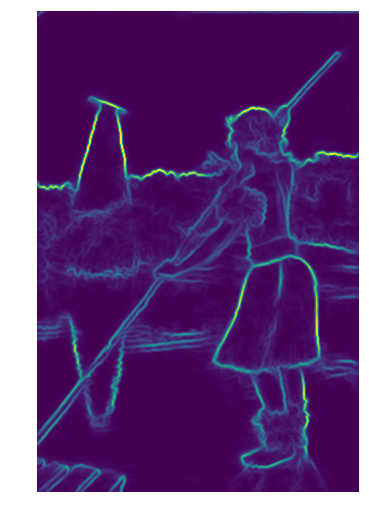

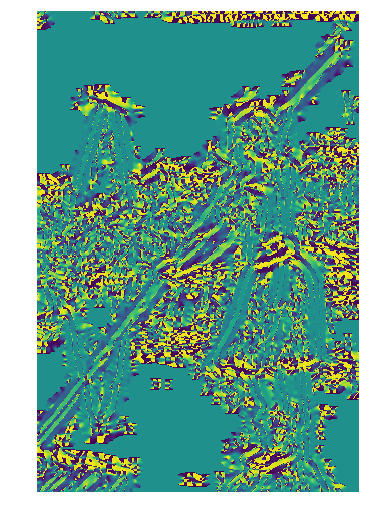

In [3]:
sed_gradient = imageio.imread("data/101087_SED.png")
sed_gradient = sed_gradient.astype(np.float64)/255
gradient_orientation = hg.gradient_orientation(sed_gradient)
print(sed_gradient.shape)
imshow(sed_gradient)
imshow(gradient_orientation)

In [4]:
graph = hg.get_4_adjacency_graph(sed_gradient.shape)
edge_weights = hg.weight_graph(graph, sed_gradient, hg.WeightFunction.mean)
edge_orientations = hg.weight_graph(graph, gradient_orientation, hg.WeightFunction.mean)

In [5]:
%%timeit
tree = hg.mean_pb_hierarchy(graph, edge_weights=edge_weights)
rag = hg.get_attribute(tree, "leaf_graph")
sm_rag = hg.saliency(tree)
sm_graph = hg.rag_back_project_edge_weights(rag, sm_rag)
sm_viz = hg.graph_4_adjacency_2_khalimsky(graph, edge_weights=sm_graph)
sm_viz = 1./(1+np.exp(-8*(sm_viz-0.35)))
#imshow(sm_viz)

44.8 ms ± 947 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit
tree = hg.mean_pb_hierarchy(graph, edge_weights=edge_weights, edge_orientations=edge_orientations)
rag = hg.get_attribute(tree, "leaf_graph")
sm_rag = hg.saliency(tree)
sm_graph = hg.rag_back_project_edge_weights(rag, sm_rag)
sm_viz = hg.graph_4_adjacency_2_khalimsky(graph, edge_weights=sm_graph)
sm_viz = 1./(1+np.exp(-8*(sm_viz-0.35)))
#imshow(sm_viz)

67.5 ms ± 619 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


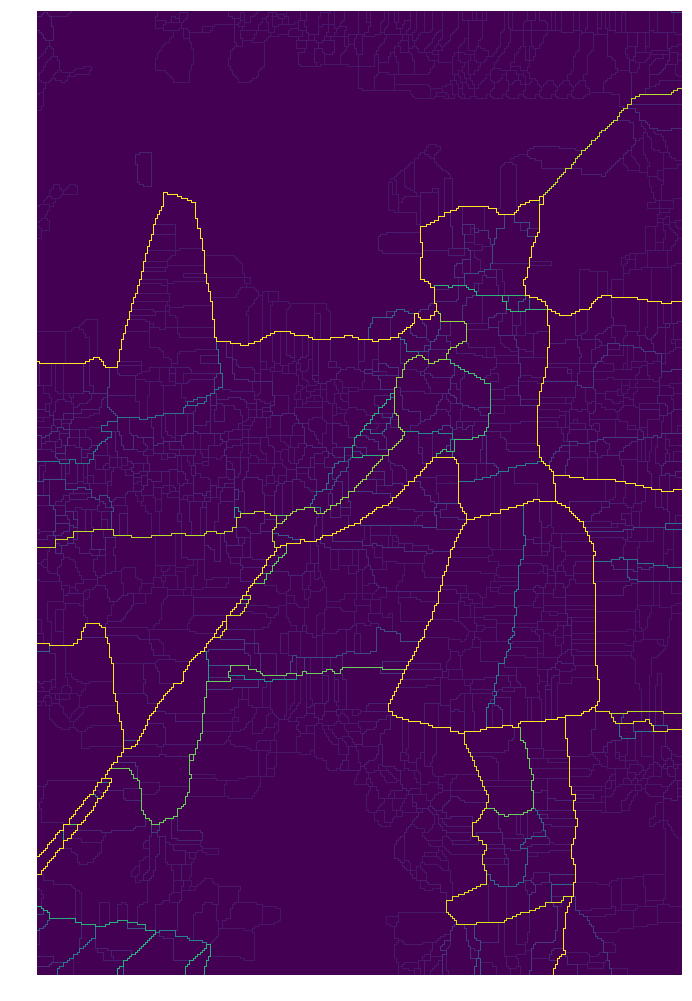

In [7]:
import scipy.io as sio
ucm_scg = sio.loadmat("data/101087_SCG_UCM.mat")
imshow(ucm_scg['ucm2'])